# Introduction
The properties of lunar craters can provide insight into planetary formation, surface dating, and the properties of their incident projectiles (Ivanov et al. 2002). Notably, crater chronometry systems such as isochrons have been particularly useful in dating geological surfaces with size frequency distributions (SFD) of meteor diameters on Mars and the Moon (Hartmann 1999; Williams et al. 2014). 

In this work, we will model the size frequency distribution of lunar craters using Monte Carlo simulations and known asteroid SFDs. We draw upon research from other authors to understand lunar crater SFD (Cross 1966; Ivanov et al. 2002; Wilhelms et al. 1978), impact crater scaling laws based on asteroid properties (Holsapple 1987; Schmidt 1980; Wheeler & Mathias 2019), and apply Monte Carlo simulations to asteroids (Williams et al. 2014). We aim to derive results consistent with the lunar production function and modern crater catalogs. In particular, we will compare our simulated SFDs against the updated, uncertainty-aware lunar production function emerging from Robbins (2018), which leverages a nearly global, ≥1-km crater database to reconcile differences between the Hartmann and Neukum chronologies in the critical 0.5–50 km range (Robbins 2018). 

# Methods



In [19]:
import numpy as np

def r_plot_prediction(diameter_list, coefficient_list):
    asteroid_count_list = []
    for d in diameter_list:
        log_d = np.log10(d)
        log_n = 0
        for i, coeff in enumerate(coefficient_list):
            log_n += coeff * (log_d ** i)
        n = 10 ** log_n
        asteroid_count_list.append(n)
    return asteroid_count_list

460096726.5811171


Text(0, 0.5, 'Frequency of Asteroid Count')

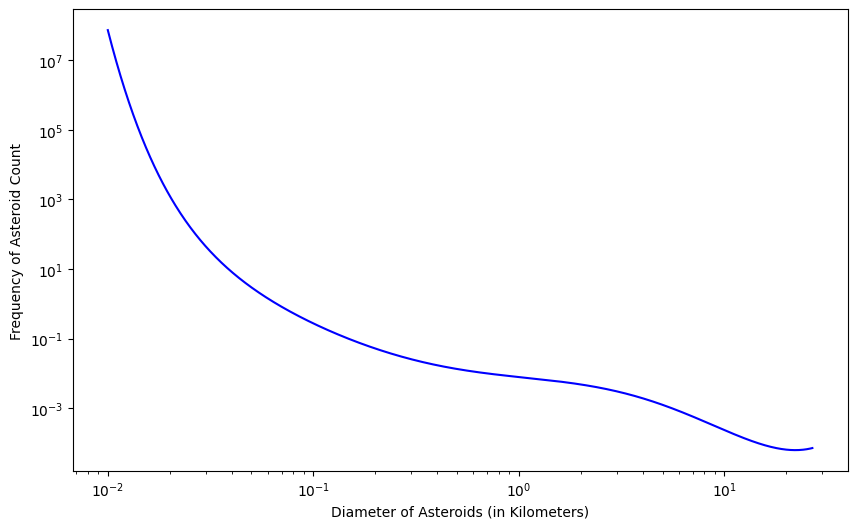

In [20]:
# plot data of diameter against asteroid count

import matplotlib.pyplot as plt


# create initial lists
bin_count = 1000
min_diameter = 0.01
max_diameeter = 27
diameter_list = np.logspace(np.log10(min_diameter), np.log10(max_diameeter), num=bin_count )
coefficient_list = [0,1.375, 0.1272, -1.2821, -0.3075, 0.4148, 0.1911, -0.04261, -3.1802e-3, 2.799e-3, 6.892e-4, 2.614e-6, -1.416e-6, -1.191e-6]

# get the list of relative plots
r_list = r_plot_prediction(diameter_list=diameter_list, coefficient_list=coefficient_list)
diff_diameter = np.diff(diameter_list)

diameter_list, r_list = diameter_list[:-1], r_list[:-1]

asteroid_count_list = r_list * diff_diameter * (diameter_list ** -3)

print(sum(asteroid_count_list))


# plot diameter against asteroid count list
plt.figure(figsize=(10, 6))
plt.loglog(diameter_list, asteroid_count_list, label='Asteroid Count Prediction', color='blue')
plt.xlabel("Diameter of Asteroids (in Kilometers)")
plt.ylabel("Frequency of Asteroid Count")

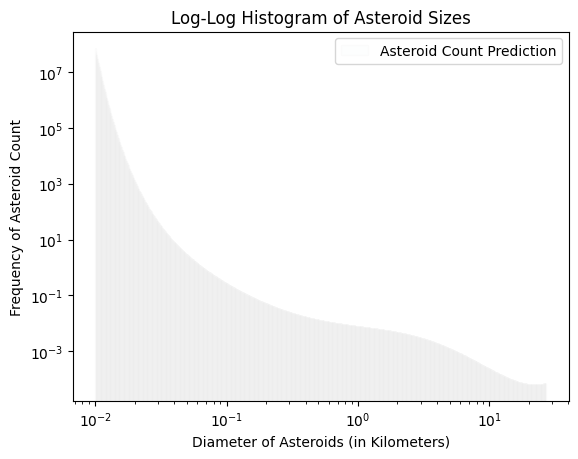

In [21]:
from matplotlib import pyplot as plt
plt.bar(diameter_list, asteroid_count_list, width=np.diff(np.append(diameter_list, diameter_list[-1]*1.01)), 
        align='edge', edgecolor='k', color='skyblue', alpha=0.01, label='Asteroid Count Prediction')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Diameter of Asteroids (in Kilometers)")
plt.ylabel("Frequency of Asteroid Count")
plt.title("Log-Log Histogram of Asteroid Sizes")
plt.legend()
plt.show()

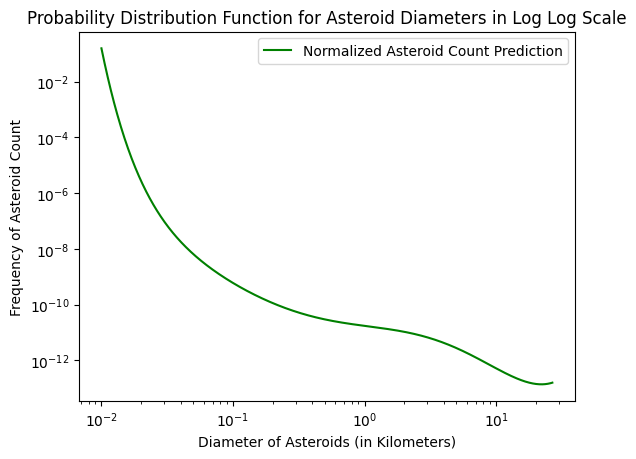

0.1587052205490762

In [22]:
normalized_asteroid_count_list = asteroid_count_list / sum(asteroid_count_list)

from matplotlib import pyplot as plt
# plt.bar(diameter_list, normalized_asteroid_count_list, width=np.diff(np.append(diameter_list, diameter_list[-1]*1.01)), 
#         align='edge', edgecolor='k', color='skyblue', alpha=0.01, label='Asteroid Count Prediction')
plt.plot(diameter_list, normalized_asteroid_count_list, label='Normalized Asteroid Count Prediction', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Diameter of Asteroids (in Kilometers)")
plt.ylabel("Frequency of Asteroid Count")
plt.title("Probability Distribution Function for Asteroid Diameters in Log Log Scale")
plt.legend()
plt.show()

max(normalized_asteroid_count_list)